c:\Users\44635\.conda\envs\graphenv\lib\site-packages\torch_geometric\data\storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'x', 'y', 'val_mask', 'test_mask', 'train_mask'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


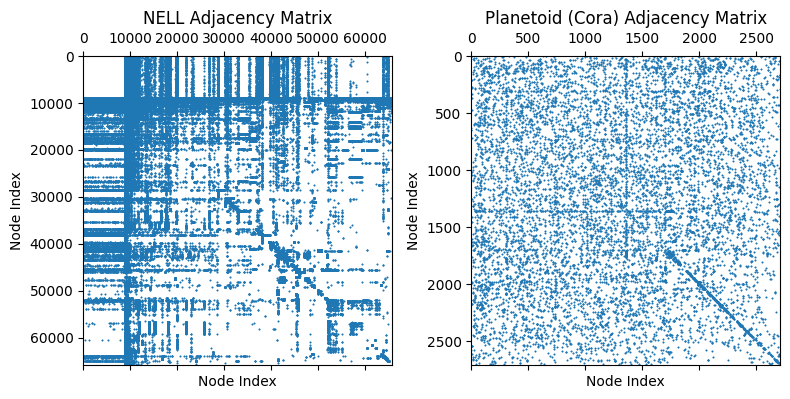

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import coo_matrix
import torch
import torch_sparse
from torch_geometric.datasets import NELL, Planetoid

# Load the NELL dataset
# Change to your own root
nell_dataset = NELL(root=r'C:\Users\44635\Downloads\nell_data')
# Load an example Planetoid dataset, e.g., Cora
planetoid_dataset = Planetoid(root=r'C:\Users\44635\Downloads\nell_data', name='Cora')

# Initialize list to store the adjacency matrices
adj_matrices = []
datasets = [nell_dataset, planetoid_dataset]

for dataset in datasets:
    # Get the edge index and create a sparse matrix for each dataset
    edge_index = dataset[0].edge_index
    num_nodes = dataset[0].num_nodes
    adj_matrix = coo_matrix((np.ones(edge_index.shape[1]), (edge_index[0], edge_index[1])),
                            shape=(num_nodes, num_nodes))
    adj_matrices.append(adj_matrix)

# Plot the sparsity patterns of the adjacency matrices
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the size as needed

titles = ['NELL Adjacency Matrix', 'Planetoid (Cora) Adjacency Matrix']
for i, ax in enumerate(axes.flatten()):
    ax.spy(adj_matrices[i], markersize=0.5)  # Adjust markersize as needed
    ax.set_title(titles[i])
    ax.set_xlabel('Node Index')
    ax.set_ylabel('Node Index')

plt.tight_layout()
plt.show()


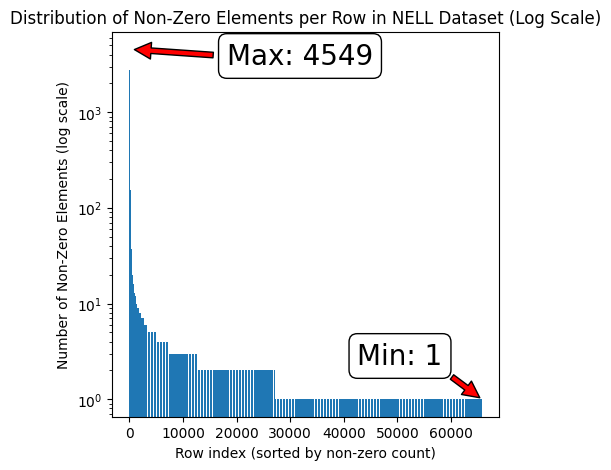

In [42]:
plt.figure(figsize=(5, 5))
plt.bar(range(len(row_counts_sorted)), row_counts_sorted)
plt.yscale('log')  # Log scale to observe power law distribution

# Annotating the maximum value with specific figure coordinates and a red arrow
plt.annotate(f'Max: {row_counts_sorted[0]}',  # The first element is the max value
             xy=(0, row_counts_sorted[0]), xycoords='data',
             xytext=(3/5, 4/5), textcoords='figure fraction',  # Specific location (1, 4)
             fontsize=20,  # Larger text
             ha='center', va='bottom',
             arrowprops=dict(facecolor='red', shrink=0.05),  # Red arrow
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))  # Optional bbox

# Annotating the minimum value with specific figure coordinates and a red arrow
plt.annotate(f'Min: {row_counts_sorted[-1]}',  # The last element is the min value
             xy=(len(row_counts_sorted) - 1, row_counts_sorted[-1]), xycoords='data',
             xytext=(4/5, 1/5), textcoords='figure fraction',  # Specific location (4, 1)
             fontsize=20,  # Larger text
             ha='center', va='bottom',
             arrowprops=dict(facecolor='red', shrink=0.05),  # Red arrow
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))  # Optional bbox

plt.title('Distribution of Non-Zero Elements per Row in NELL Dataset (Log Scale)')
plt.xlabel('Row index (sorted by non-zero count)')
plt.ylabel('Number of Non-Zero Elements (log scale)')
plt.show()


In [37]:
max_nonzero_sorted = row_counts_sorted[0]
print(max_nonzero_sorted)
min_nonzero_sorted = row_counts_sorted[-1]
print(min_nonzero_sorted)

4549
1
